# Parkinson's Disease Prediction Model 1

## Importing the dependencies

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Loading the data

In [46]:
parkinsons_data = pd.read_csv('parkinsons.csv')

## Data Exploration

In [47]:
parkinsons_data.shape

(195, 24)

In [48]:
parkinsons_data.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
50,phon_R01_S13_3,124.445,135.069,117.495,0.00431,0.00003,0.00141,0.00167,0.00422,0.02184,...,0.03724,0.00479,25.135,0,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
172,phon_R01_S43_2,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,...,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
89,phon_R01_S21_6,179.711,225.930,144.878,0.00709,0.00004,0.00391,0.00419,0.01172,0.04313,...,0.06892,0.07223,11.866,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
22,phon_R01_S05_5,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,0.04351,...,0.06685,0.01280,22.468,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695


In [60]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [61]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [49]:
# Label: 'status'

In [50]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

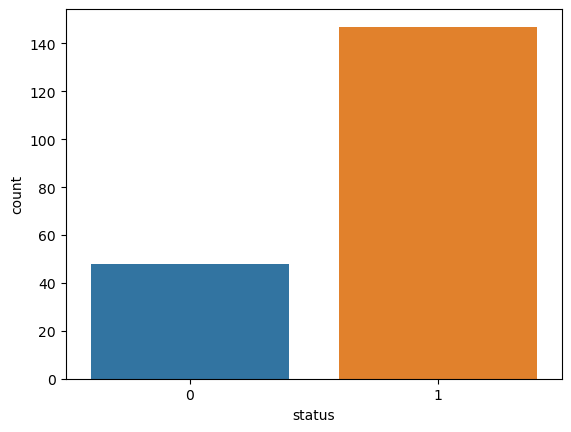

In [51]:
sns.countplot(x='status', data=parkinsons_data)
plt.show()

Clearly there is class imbalance

## Splitting the features and label

In [52]:
X = parkinsons_data.drop(columns=['status', 'name'])
y = parkinsons_data['status']

## Splitting the data into training set and test set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Feature scaling the data

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the models and comparing the accuracies

In [55]:
classifiers = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(),
        'params': {
            'solver': ['liblinear', 'lbfgs'],
            'C': [0.1, 1, 10]
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Support Vector Classifier',
        'classifier': SVC(),
        'params': {
            'kernel': ['linear', 'sigmoid', 'rbf'],
            'C': [0.1, 1, 10]
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Decision Tree Classifier',
        'classifier': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Random Forest Classifier',
        'classifier': RandomForestClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'n_estimators': [50, 100, 200]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Gaussian Naive Bayes',
        'classifier': GaussianNB(),
        'params': {},
        'train_data': 'X_train'
    },
    {
        'name': 'XGB Classifier',
        'classifier': XGBClassifier(),
        'params': {},
        'train_data': 'X_train'
    },
    {
        'name': 'CatBoost Classifier',
        'classifier': CatBoostClassifier(),
        'params': {},
        'train_data': 'X_train'
    }
]

In [56]:
results_df = pd.DataFrame(columns=['Classifier', 'Best Parameters', 'Accuracy'])

In [57]:
for classifier in classifiers:
    if classifier['train_data'] == 'X_train':
        X_train_data = X_train
    elif classifier['train_data'] == 'X_train_scaled':
        X_train_data = X_train_scaled
    else:
        raise ValueError("Invalid train data value. It must be 'X_train' or 'X_train_scaled'.")
        
    grid_search = GridSearchCV(classifier['classifier'], classifier['params'], cv=5)
    grid_search.fit(X_train_data, y_train)
    best_classifier = grid_search.best_estimator_
    if classifier['train_data'] == 'X_train':
        y_pred = best_classifier.predict(X_test)
    elif classifier['train_data'] == 'X_train_scaled':
        X_test_scaled = scaler.transform(X_test)
        y_pred = best_classifier.predict(X_test_scaled)
        
    accuracy = accuracy_score(y_test, y_pred)
    
    results_df = results_df.append({
        'Classifier': classifier['name'],
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy
    }, ignore_index=True)
    

C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.

Learning rate set to 0.004225
0:	learn: 0.6891184	total: 2.72ms	remaining: 2.72s
1:	learn: 0.6855223	total: 5.01ms	remaining: 2.5s
2:	learn: 0.6811523	total: 7.51ms	remaining: 2.5s
3:	learn: 0.6768089	total: 10.3ms	remaining: 2.57s
4:	learn: 0.6717970	total: 12.9ms	remaining: 2.57s
5:	learn: 0.6675821	total: 15.1ms	remaining: 2.5s
6:	learn: 0.6638400	total: 17.4ms	remaining: 2.46s
7:	learn: 0.6596279	total: 19.6ms	remaining: 2.42s
8:	learn: 0.6557173	total: 22.1ms	remaining: 2.43s
9:	learn: 0.6514478	total: 24.6ms	remaining: 2.44s
10:	learn: 0.6472249	total: 27.1ms	remaining: 2.44s
11:	learn: 0.6443133	total: 29.3ms	remaining: 2.41s
12:	learn: 0.6407522	total: 31.4ms	remaining: 2.39s
13:	learn: 0.6373581	total: 33.7ms	remaining: 2.38s
14:	learn: 0.6337103	total: 35.9ms	remaining: 2.36s
15:	learn: 0.6295592	total: 38.1ms	remaining: 2.35s
16:	learn: 0.6251779	total: 40.9ms	remaining: 2.36s
17:	learn: 0.6224563	total: 43.3ms	remaining: 2.36s
18:	learn: 0.6178748	total: 45.6ms	remaining: 2

212:	learn: 0.2427506	total: 555ms	remaining: 2.05s
213:	learn: 0.2415477	total: 558ms	remaining: 2.05s
214:	learn: 0.2408046	total: 561ms	remaining: 2.05s
215:	learn: 0.2395477	total: 563ms	remaining: 2.04s
216:	learn: 0.2385611	total: 566ms	remaining: 2.04s
217:	learn: 0.2372312	total: 569ms	remaining: 2.04s
218:	learn: 0.2364134	total: 572ms	remaining: 2.04s
219:	learn: 0.2351867	total: 575ms	remaining: 2.04s
220:	learn: 0.2341242	total: 578ms	remaining: 2.04s
221:	learn: 0.2333837	total: 581ms	remaining: 2.04s
222:	learn: 0.2323113	total: 584ms	remaining: 2.04s
223:	learn: 0.2312676	total: 587ms	remaining: 2.03s
224:	learn: 0.2304532	total: 589ms	remaining: 2.03s
225:	learn: 0.2294998	total: 591ms	remaining: 2.02s
226:	learn: 0.2288137	total: 594ms	remaining: 2.02s
227:	learn: 0.2279870	total: 597ms	remaining: 2.02s
228:	learn: 0.2271470	total: 600ms	remaining: 2.02s
229:	learn: 0.2264794	total: 604ms	remaining: 2.02s
230:	learn: 0.2255554	total: 606ms	remaining: 2.02s
231:	learn: 

421:	learn: 0.1247479	total: 1.13s	remaining: 1.54s
422:	learn: 0.1244669	total: 1.13s	remaining: 1.54s
423:	learn: 0.1242376	total: 1.13s	remaining: 1.54s
424:	learn: 0.1239037	total: 1.13s	remaining: 1.53s
425:	learn: 0.1237018	total: 1.14s	remaining: 1.53s
426:	learn: 0.1233598	total: 1.14s	remaining: 1.53s
427:	learn: 0.1229949	total: 1.14s	remaining: 1.53s
428:	learn: 0.1225445	total: 1.15s	remaining: 1.52s
429:	learn: 0.1221677	total: 1.15s	remaining: 1.52s
430:	learn: 0.1218592	total: 1.15s	remaining: 1.52s
431:	learn: 0.1215485	total: 1.16s	remaining: 1.52s
432:	learn: 0.1211433	total: 1.16s	remaining: 1.52s
433:	learn: 0.1209752	total: 1.16s	remaining: 1.51s
434:	learn: 0.1206799	total: 1.16s	remaining: 1.51s
435:	learn: 0.1203368	total: 1.17s	remaining: 1.51s
436:	learn: 0.1200009	total: 1.17s	remaining: 1.5s
437:	learn: 0.1195534	total: 1.17s	remaining: 1.5s
438:	learn: 0.1192259	total: 1.17s	remaining: 1.5s
439:	learn: 0.1189148	total: 1.18s	remaining: 1.5s
440:	learn: 0.11

641:	learn: 0.0745301	total: 1.7s	remaining: 946ms
642:	learn: 0.0743441	total: 1.7s	remaining: 945ms
643:	learn: 0.0741953	total: 1.7s	remaining: 942ms
644:	learn: 0.0740337	total: 1.71s	remaining: 939ms
645:	learn: 0.0738984	total: 1.71s	remaining: 937ms
646:	learn: 0.0736941	total: 1.71s	remaining: 934ms
647:	learn: 0.0736334	total: 1.72s	remaining: 932ms
648:	learn: 0.0735080	total: 1.72s	remaining: 929ms
649:	learn: 0.0733924	total: 1.72s	remaining: 927ms
650:	learn: 0.0732138	total: 1.72s	remaining: 924ms
651:	learn: 0.0730511	total: 1.73s	remaining: 922ms
652:	learn: 0.0729623	total: 1.73s	remaining: 919ms
653:	learn: 0.0728041	total: 1.73s	remaining: 917ms
654:	learn: 0.0726284	total: 1.74s	remaining: 915ms
655:	learn: 0.0724551	total: 1.74s	remaining: 912ms
656:	learn: 0.0722692	total: 1.74s	remaining: 909ms
657:	learn: 0.0720409	total: 1.74s	remaining: 906ms
658:	learn: 0.0718960	total: 1.75s	remaining: 904ms
659:	learn: 0.0717565	total: 1.75s	remaining: 901ms
660:	learn: 0.0

860:	learn: 0.0496751	total: 2.29s	remaining: 369ms
861:	learn: 0.0495984	total: 2.29s	remaining: 367ms
862:	learn: 0.0495132	total: 2.29s	remaining: 364ms
863:	learn: 0.0494310	total: 2.29s	remaining: 361ms
864:	learn: 0.0493419	total: 2.3s	remaining: 359ms
865:	learn: 0.0492829	total: 2.3s	remaining: 356ms
866:	learn: 0.0492373	total: 2.3s	remaining: 353ms
867:	learn: 0.0491983	total: 2.31s	remaining: 351ms
868:	learn: 0.0491292	total: 2.31s	remaining: 348ms
869:	learn: 0.0490638	total: 2.31s	remaining: 345ms
870:	learn: 0.0489852	total: 2.31s	remaining: 343ms
871:	learn: 0.0488760	total: 2.32s	remaining: 340ms
872:	learn: 0.0487935	total: 2.32s	remaining: 337ms
873:	learn: 0.0487214	total: 2.32s	remaining: 335ms
874:	learn: 0.0486476	total: 2.33s	remaining: 332ms
875:	learn: 0.0485976	total: 2.33s	remaining: 330ms
876:	learn: 0.0485305	total: 2.33s	remaining: 327ms
877:	learn: 0.0484919	total: 2.33s	remaining: 324ms
878:	learn: 0.0484170	total: 2.34s	remaining: 322ms
879:	learn: 0.0

74:	learn: 0.4448119	total: 192ms	remaining: 2.37s
75:	learn: 0.4424450	total: 195ms	remaining: 2.37s
76:	learn: 0.4403034	total: 198ms	remaining: 2.37s
77:	learn: 0.4380943	total: 200ms	remaining: 2.37s
78:	learn: 0.4357147	total: 203ms	remaining: 2.36s
79:	learn: 0.4333752	total: 205ms	remaining: 2.36s
80:	learn: 0.4310921	total: 208ms	remaining: 2.37s
81:	learn: 0.4289803	total: 211ms	remaining: 2.37s
82:	learn: 0.4266196	total: 214ms	remaining: 2.36s
83:	learn: 0.4247933	total: 216ms	remaining: 2.36s
84:	learn: 0.4223869	total: 219ms	remaining: 2.35s
85:	learn: 0.4201194	total: 221ms	remaining: 2.35s
86:	learn: 0.4180509	total: 223ms	remaining: 2.34s
87:	learn: 0.4159076	total: 226ms	remaining: 2.34s
88:	learn: 0.4134513	total: 228ms	remaining: 2.34s
89:	learn: 0.4112651	total: 231ms	remaining: 2.34s
90:	learn: 0.4090488	total: 234ms	remaining: 2.33s
91:	learn: 0.4065056	total: 236ms	remaining: 2.33s
92:	learn: 0.4042349	total: 238ms	remaining: 2.33s
93:	learn: 0.4028000	total: 241

302:	learn: 0.1795669	total: 780ms	remaining: 1.79s
303:	learn: 0.1788644	total: 782ms	remaining: 1.79s
304:	learn: 0.1782973	total: 786ms	remaining: 1.79s
305:	learn: 0.1778183	total: 789ms	remaining: 1.79s
306:	learn: 0.1773526	total: 791ms	remaining: 1.79s
307:	learn: 0.1767872	total: 794ms	remaining: 1.78s
308:	learn: 0.1764139	total: 798ms	remaining: 1.78s
309:	learn: 0.1758155	total: 801ms	remaining: 1.78s
310:	learn: 0.1753683	total: 804ms	remaining: 1.78s
311:	learn: 0.1747369	total: 807ms	remaining: 1.78s
312:	learn: 0.1745541	total: 809ms	remaining: 1.77s
313:	learn: 0.1742120	total: 811ms	remaining: 1.77s
314:	learn: 0.1738652	total: 814ms	remaining: 1.77s
315:	learn: 0.1734846	total: 818ms	remaining: 1.77s
316:	learn: 0.1728907	total: 820ms	remaining: 1.77s
317:	learn: 0.1723188	total: 823ms	remaining: 1.76s
318:	learn: 0.1717500	total: 825ms	remaining: 1.76s
319:	learn: 0.1710393	total: 828ms	remaining: 1.76s
320:	learn: 0.1703709	total: 830ms	remaining: 1.76s
321:	learn: 

525:	learn: 0.0982552	total: 1.36s	remaining: 1.23s
526:	learn: 0.0981139	total: 1.36s	remaining: 1.22s
527:	learn: 0.0977237	total: 1.36s	remaining: 1.22s
528:	learn: 0.0974584	total: 1.37s	remaining: 1.22s
529:	learn: 0.0972289	total: 1.37s	remaining: 1.22s
530:	learn: 0.0970188	total: 1.37s	remaining: 1.21s
531:	learn: 0.0968219	total: 1.38s	remaining: 1.21s
532:	learn: 0.0965841	total: 1.38s	remaining: 1.21s
533:	learn: 0.0963239	total: 1.38s	remaining: 1.21s
534:	learn: 0.0960313	total: 1.38s	remaining: 1.2s
535:	learn: 0.0958272	total: 1.39s	remaining: 1.2s
536:	learn: 0.0957335	total: 1.39s	remaining: 1.2s
537:	learn: 0.0955140	total: 1.39s	remaining: 1.2s
538:	learn: 0.0952890	total: 1.39s	remaining: 1.19s
539:	learn: 0.0949791	total: 1.4s	remaining: 1.19s
540:	learn: 0.0947755	total: 1.4s	remaining: 1.19s
541:	learn: 0.0945247	total: 1.4s	remaining: 1.18s
542:	learn: 0.0942527	total: 1.4s	remaining: 1.18s
543:	learn: 0.0939985	total: 1.41s	remaining: 1.18s
544:	learn: 0.093796

737:	learn: 0.0630121	total: 1.93s	remaining: 686ms
738:	learn: 0.0628849	total: 1.94s	remaining: 684ms
739:	learn: 0.0627272	total: 1.94s	remaining: 681ms
740:	learn: 0.0625687	total: 1.94s	remaining: 678ms
741:	learn: 0.0624586	total: 1.94s	remaining: 676ms
742:	learn: 0.0623916	total: 1.95s	remaining: 673ms
743:	learn: 0.0622844	total: 1.95s	remaining: 671ms
744:	learn: 0.0621900	total: 1.95s	remaining: 668ms
745:	learn: 0.0621375	total: 1.95s	remaining: 665ms
746:	learn: 0.0619838	total: 1.96s	remaining: 663ms
747:	learn: 0.0618591	total: 1.96s	remaining: 660ms
748:	learn: 0.0616852	total: 1.96s	remaining: 658ms
749:	learn: 0.0615908	total: 1.97s	remaining: 655ms
750:	learn: 0.0615038	total: 1.97s	remaining: 652ms
751:	learn: 0.0613956	total: 1.97s	remaining: 650ms
752:	learn: 0.0611989	total: 1.97s	remaining: 647ms
753:	learn: 0.0610771	total: 1.98s	remaining: 645ms
754:	learn: 0.0609626	total: 1.98s	remaining: 642ms
755:	learn: 0.0608620	total: 1.98s	remaining: 639ms
756:	learn: 

949:	learn: 0.0440145	total: 2.51s	remaining: 132ms
950:	learn: 0.0439393	total: 2.51s	remaining: 129ms
951:	learn: 0.0438400	total: 2.52s	remaining: 127ms
952:	learn: 0.0437750	total: 2.52s	remaining: 124ms
953:	learn: 0.0437162	total: 2.52s	remaining: 122ms
954:	learn: 0.0436599	total: 2.52s	remaining: 119ms
955:	learn: 0.0435870	total: 2.53s	remaining: 116ms
956:	learn: 0.0435218	total: 2.53s	remaining: 114ms
957:	learn: 0.0434344	total: 2.53s	remaining: 111ms
958:	learn: 0.0433337	total: 2.54s	remaining: 108ms
959:	learn: 0.0432667	total: 2.54s	remaining: 106ms
960:	learn: 0.0432093	total: 2.54s	remaining: 103ms
961:	learn: 0.0431431	total: 2.54s	remaining: 100ms
962:	learn: 0.0431109	total: 2.55s	remaining: 97.8ms
963:	learn: 0.0430374	total: 2.55s	remaining: 95.2ms
964:	learn: 0.0429796	total: 2.55s	remaining: 92.6ms
965:	learn: 0.0429012	total: 2.55s	remaining: 89.9ms
966:	learn: 0.0428144	total: 2.56s	remaining: 87.3ms
967:	learn: 0.0427329	total: 2.56s	remaining: 84.6ms
968:	l

142:	learn: 0.3219970	total: 387ms	remaining: 2.32s
143:	learn: 0.3201353	total: 391ms	remaining: 2.32s
144:	learn: 0.3186195	total: 393ms	remaining: 2.32s
145:	learn: 0.3171631	total: 396ms	remaining: 2.31s
146:	learn: 0.3155465	total: 398ms	remaining: 2.31s
147:	learn: 0.3142079	total: 401ms	remaining: 2.31s
148:	learn: 0.3127038	total: 404ms	remaining: 2.31s
149:	learn: 0.3115366	total: 407ms	remaining: 2.31s
150:	learn: 0.3099019	total: 410ms	remaining: 2.31s
151:	learn: 0.3086094	total: 413ms	remaining: 2.3s
152:	learn: 0.3074153	total: 415ms	remaining: 2.3s
153:	learn: 0.3061481	total: 418ms	remaining: 2.29s
154:	learn: 0.3047562	total: 421ms	remaining: 2.29s
155:	learn: 0.3035303	total: 424ms	remaining: 2.29s
156:	learn: 0.3020047	total: 427ms	remaining: 2.29s
157:	learn: 0.3006472	total: 430ms	remaining: 2.29s
158:	learn: 0.2990264	total: 432ms	remaining: 2.29s
159:	learn: 0.2973757	total: 435ms	remaining: 2.28s
160:	learn: 0.2964440	total: 438ms	remaining: 2.28s
161:	learn: 0.

355:	learn: 0.1512636	total: 963ms	remaining: 1.74s
356:	learn: 0.1508630	total: 966ms	remaining: 1.74s
357:	learn: 0.1503363	total: 969ms	remaining: 1.74s
358:	learn: 0.1499663	total: 971ms	remaining: 1.73s
359:	learn: 0.1495180	total: 973ms	remaining: 1.73s
360:	learn: 0.1490480	total: 976ms	remaining: 1.73s
361:	learn: 0.1485434	total: 978ms	remaining: 1.72s
362:	learn: 0.1481241	total: 981ms	remaining: 1.72s
363:	learn: 0.1477888	total: 984ms	remaining: 1.72s
364:	learn: 0.1474635	total: 986ms	remaining: 1.72s
365:	learn: 0.1469573	total: 989ms	remaining: 1.71s
366:	learn: 0.1466346	total: 991ms	remaining: 1.71s
367:	learn: 0.1461830	total: 995ms	remaining: 1.71s
368:	learn: 0.1457059	total: 997ms	remaining: 1.71s
369:	learn: 0.1452655	total: 1000ms	remaining: 1.7s
370:	learn: 0.1447482	total: 1s	remaining: 1.7s
371:	learn: 0.1443584	total: 1s	remaining: 1.7s
372:	learn: 0.1439450	total: 1.01s	remaining: 1.69s
373:	learn: 0.1433809	total: 1.01s	remaining: 1.69s
374:	learn: 0.142997

570:	learn: 0.0869435	total: 1.54s	remaining: 1.16s
571:	learn: 0.0867482	total: 1.54s	remaining: 1.16s
572:	learn: 0.0866461	total: 1.55s	remaining: 1.15s
573:	learn: 0.0864561	total: 1.55s	remaining: 1.15s
574:	learn: 0.0862370	total: 1.55s	remaining: 1.15s
575:	learn: 0.0860319	total: 1.55s	remaining: 1.15s
576:	learn: 0.0858523	total: 1.56s	remaining: 1.14s
577:	learn: 0.0856781	total: 1.56s	remaining: 1.14s
578:	learn: 0.0854779	total: 1.56s	remaining: 1.14s
579:	learn: 0.0852368	total: 1.57s	remaining: 1.14s
580:	learn: 0.0850257	total: 1.57s	remaining: 1.13s
581:	learn: 0.0848466	total: 1.57s	remaining: 1.13s
582:	learn: 0.0846448	total: 1.58s	remaining: 1.13s
583:	learn: 0.0844614	total: 1.58s	remaining: 1.13s
584:	learn: 0.0843579	total: 1.58s	remaining: 1.12s
585:	learn: 0.0842105	total: 1.58s	remaining: 1.12s
586:	learn: 0.0839520	total: 1.59s	remaining: 1.12s
587:	learn: 0.0837536	total: 1.59s	remaining: 1.11s
588:	learn: 0.0835222	total: 1.59s	remaining: 1.11s
589:	learn: 

792:	learn: 0.0564974	total: 2.12s	remaining: 555ms
793:	learn: 0.0564420	total: 2.13s	remaining: 552ms
794:	learn: 0.0563581	total: 2.13s	remaining: 549ms
795:	learn: 0.0562629	total: 2.13s	remaining: 547ms
796:	learn: 0.0561676	total: 2.14s	remaining: 544ms
797:	learn: 0.0561003	total: 2.14s	remaining: 542ms
798:	learn: 0.0560548	total: 2.14s	remaining: 539ms
799:	learn: 0.0559497	total: 2.15s	remaining: 536ms
800:	learn: 0.0558704	total: 2.15s	remaining: 534ms
801:	learn: 0.0557452	total: 2.15s	remaining: 531ms
802:	learn: 0.0556264	total: 2.15s	remaining: 528ms
803:	learn: 0.0555240	total: 2.16s	remaining: 526ms
804:	learn: 0.0554701	total: 2.16s	remaining: 523ms
805:	learn: 0.0553267	total: 2.16s	remaining: 520ms
806:	learn: 0.0552451	total: 2.16s	remaining: 517ms
807:	learn: 0.0551730	total: 2.17s	remaining: 515ms
808:	learn: 0.0550694	total: 2.17s	remaining: 512ms
809:	learn: 0.0549914	total: 2.17s	remaining: 509ms
810:	learn: 0.0548969	total: 2.17s	remaining: 507ms
811:	learn: 

Learning rate set to 0.004239
0:	learn: 0.6889390	total: 3.54ms	remaining: 3.53s
1:	learn: 0.6842748	total: 6.67ms	remaining: 3.33s
2:	learn: 0.6805064	total: 9.62ms	remaining: 3.2s
3:	learn: 0.6765406	total: 12.3ms	remaining: 3.06s
4:	learn: 0.6719542	total: 14.7ms	remaining: 2.92s
5:	learn: 0.6676954	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6634661	total: 20.5ms	remaining: 2.91s
7:	learn: 0.6601154	total: 23.1ms	remaining: 2.86s
8:	learn: 0.6555797	total: 25.7ms	remaining: 2.83s
9:	learn: 0.6510937	total: 28.2ms	remaining: 2.79s
10:	learn: 0.6461700	total: 30.5ms	remaining: 2.74s
11:	learn: 0.6426328	total: 33.3ms	remaining: 2.74s
12:	learn: 0.6386514	total: 36.4ms	remaining: 2.76s
13:	learn: 0.6346003	total: 39ms	remaining: 2.75s
14:	learn: 0.6310416	total: 41.4ms	remaining: 2.72s
15:	learn: 0.6264405	total: 43.7ms	remaining: 2.69s
16:	learn: 0.6219233	total: 46.1ms	remaining: 2.67s
17:	learn: 0.6186320	total: 48.9ms	remaining: 2.67s
18:	learn: 0.6146138	total: 52.4ms	remaining: 2

224:	learn: 0.2280709	total: 591ms	remaining: 2.03s
225:	learn: 0.2271207	total: 594ms	remaining: 2.03s
226:	learn: 0.2263874	total: 597ms	remaining: 2.03s
227:	learn: 0.2259086	total: 600ms	remaining: 2.03s
228:	learn: 0.2252283	total: 602ms	remaining: 2.03s
229:	learn: 0.2244092	total: 605ms	remaining: 2.02s
230:	learn: 0.2237105	total: 608ms	remaining: 2.02s
231:	learn: 0.2228141	total: 611ms	remaining: 2.02s
232:	learn: 0.2219852	total: 614ms	remaining: 2.02s
233:	learn: 0.2212510	total: 617ms	remaining: 2.02s
234:	learn: 0.2201436	total: 619ms	remaining: 2.02s
235:	learn: 0.2193613	total: 623ms	remaining: 2.02s
236:	learn: 0.2185421	total: 626ms	remaining: 2.01s
237:	learn: 0.2175255	total: 628ms	remaining: 2.01s
238:	learn: 0.2165242	total: 631ms	remaining: 2.01s
239:	learn: 0.2156168	total: 633ms	remaining: 2s
240:	learn: 0.2150598	total: 636ms	remaining: 2s
241:	learn: 0.2143067	total: 639ms	remaining: 2s
242:	learn: 0.2133988	total: 641ms	remaining: 2s
243:	learn: 0.2128274	to

453:	learn: 0.1139065	total: 1.2s	remaining: 1.44s
454:	learn: 0.1136511	total: 1.2s	remaining: 1.44s
455:	learn: 0.1134034	total: 1.21s	remaining: 1.44s
456:	learn: 0.1131349	total: 1.21s	remaining: 1.44s
457:	learn: 0.1128474	total: 1.21s	remaining: 1.43s
458:	learn: 0.1125729	total: 1.21s	remaining: 1.43s
459:	learn: 0.1122984	total: 1.22s	remaining: 1.43s
460:	learn: 0.1120084	total: 1.22s	remaining: 1.43s
461:	learn: 0.1118646	total: 1.22s	remaining: 1.42s
462:	learn: 0.1116976	total: 1.22s	remaining: 1.42s
463:	learn: 0.1114381	total: 1.23s	remaining: 1.42s
464:	learn: 0.1111910	total: 1.23s	remaining: 1.42s
465:	learn: 0.1108284	total: 1.23s	remaining: 1.41s
466:	learn: 0.1105724	total: 1.24s	remaining: 1.41s
467:	learn: 0.1102551	total: 1.24s	remaining: 1.41s
468:	learn: 0.1099602	total: 1.24s	remaining: 1.41s
469:	learn: 0.1097267	total: 1.25s	remaining: 1.4s
470:	learn: 0.1095470	total: 1.25s	remaining: 1.4s
471:	learn: 0.1092841	total: 1.25s	remaining: 1.4s
472:	learn: 0.108

672:	learn: 0.0699560	total: 1.79s	remaining: 869ms
673:	learn: 0.0698374	total: 1.79s	remaining: 867ms
674:	learn: 0.0697316	total: 1.79s	remaining: 864ms
675:	learn: 0.0696327	total: 1.8s	remaining: 862ms
676:	learn: 0.0694897	total: 1.8s	remaining: 859ms
677:	learn: 0.0693797	total: 1.8s	remaining: 857ms
678:	learn: 0.0692349	total: 1.81s	remaining: 854ms
679:	learn: 0.0690762	total: 1.81s	remaining: 851ms
680:	learn: 0.0689229	total: 1.81s	remaining: 849ms
681:	learn: 0.0688461	total: 1.81s	remaining: 846ms
682:	learn: 0.0687205	total: 1.82s	remaining: 843ms
683:	learn: 0.0685766	total: 1.82s	remaining: 841ms
684:	learn: 0.0684069	total: 1.82s	remaining: 838ms
685:	learn: 0.0683318	total: 1.82s	remaining: 836ms
686:	learn: 0.0682334	total: 1.83s	remaining: 833ms
687:	learn: 0.0681288	total: 1.83s	remaining: 831ms
688:	learn: 0.0680188	total: 1.83s	remaining: 828ms
689:	learn: 0.0678630	total: 1.84s	remaining: 825ms
690:	learn: 0.0677398	total: 1.84s	remaining: 823ms
691:	learn: 0.0

895:	learn: 0.0474630	total: 2.37s	remaining: 275ms
896:	learn: 0.0473636	total: 2.37s	remaining: 272ms
897:	learn: 0.0472977	total: 2.37s	remaining: 269ms
898:	learn: 0.0472107	total: 2.37s	remaining: 267ms
899:	learn: 0.0471408	total: 2.38s	remaining: 264ms
900:	learn: 0.0470683	total: 2.38s	remaining: 262ms
901:	learn: 0.0470102	total: 2.38s	remaining: 259ms
902:	learn: 0.0469323	total: 2.38s	remaining: 256ms
903:	learn: 0.0468583	total: 2.39s	remaining: 254ms
904:	learn: 0.0467036	total: 2.39s	remaining: 251ms
905:	learn: 0.0466360	total: 2.39s	remaining: 248ms
906:	learn: 0.0465510	total: 2.4s	remaining: 246ms
907:	learn: 0.0464744	total: 2.4s	remaining: 243ms
908:	learn: 0.0463934	total: 2.4s	remaining: 241ms
909:	learn: 0.0463242	total: 2.4s	remaining: 238ms
910:	learn: 0.0462370	total: 2.41s	remaining: 235ms
911:	learn: 0.0461643	total: 2.41s	remaining: 233ms
912:	learn: 0.0460709	total: 2.41s	remaining: 230ms
913:	learn: 0.0459699	total: 2.42s	remaining: 227ms
914:	learn: 0.04

97:	learn: 0.3779746	total: 258ms	remaining: 2.38s
98:	learn: 0.3760661	total: 262ms	remaining: 2.38s
99:	learn: 0.3740242	total: 264ms	remaining: 2.38s
100:	learn: 0.3719980	total: 267ms	remaining: 2.38s
101:	learn: 0.3701640	total: 270ms	remaining: 2.37s
102:	learn: 0.3682135	total: 272ms	remaining: 2.37s
103:	learn: 0.3661941	total: 275ms	remaining: 2.37s
104:	learn: 0.3641513	total: 278ms	remaining: 2.37s
105:	learn: 0.3620062	total: 280ms	remaining: 2.36s
106:	learn: 0.3601664	total: 283ms	remaining: 2.36s
107:	learn: 0.3585982	total: 285ms	remaining: 2.36s
108:	learn: 0.3568986	total: 288ms	remaining: 2.35s
109:	learn: 0.3548163	total: 290ms	remaining: 2.35s
110:	learn: 0.3533498	total: 292ms	remaining: 2.34s
111:	learn: 0.3518514	total: 295ms	remaining: 2.34s
112:	learn: 0.3503605	total: 298ms	remaining: 2.34s
113:	learn: 0.3490630	total: 300ms	remaining: 2.33s
114:	learn: 0.3471388	total: 303ms	remaining: 2.33s
115:	learn: 0.3451469	total: 305ms	remaining: 2.33s
116:	learn: 0.3

316:	learn: 0.1511139	total: 840ms	remaining: 1.81s
317:	learn: 0.1506183	total: 844ms	remaining: 1.81s
318:	learn: 0.1500203	total: 847ms	remaining: 1.81s
319:	learn: 0.1494995	total: 849ms	remaining: 1.8s
320:	learn: 0.1490554	total: 852ms	remaining: 1.8s
321:	learn: 0.1486112	total: 855ms	remaining: 1.8s
322:	learn: 0.1480773	total: 858ms	remaining: 1.8s
323:	learn: 0.1474615	total: 860ms	remaining: 1.79s
324:	learn: 0.1470341	total: 863ms	remaining: 1.79s
325:	learn: 0.1463942	total: 866ms	remaining: 1.79s
326:	learn: 0.1458640	total: 869ms	remaining: 1.79s
327:	learn: 0.1454488	total: 873ms	remaining: 1.79s
328:	learn: 0.1450283	total: 876ms	remaining: 1.79s
329:	learn: 0.1445076	total: 878ms	remaining: 1.78s
330:	learn: 0.1439760	total: 881ms	remaining: 1.78s
331:	learn: 0.1434937	total: 883ms	remaining: 1.78s
332:	learn: 0.1429618	total: 887ms	remaining: 1.78s
333:	learn: 0.1424245	total: 890ms	remaining: 1.77s
334:	learn: 0.1418971	total: 893ms	remaining: 1.77s
335:	learn: 0.14

538:	learn: 0.0804599	total: 1.43s	remaining: 1.23s
539:	learn: 0.0803148	total: 1.44s	remaining: 1.22s
540:	learn: 0.0800104	total: 1.44s	remaining: 1.22s
541:	learn: 0.0798738	total: 1.44s	remaining: 1.22s
542:	learn: 0.0797113	total: 1.45s	remaining: 1.22s
543:	learn: 0.0795729	total: 1.45s	remaining: 1.21s
544:	learn: 0.0793870	total: 1.45s	remaining: 1.21s
545:	learn: 0.0792061	total: 1.46s	remaining: 1.21s
546:	learn: 0.0791301	total: 1.46s	remaining: 1.21s
547:	learn: 0.0789520	total: 1.46s	remaining: 1.2s
548:	learn: 0.0787829	total: 1.46s	remaining: 1.2s
549:	learn: 0.0786253	total: 1.47s	remaining: 1.2s
550:	learn: 0.0784832	total: 1.47s	remaining: 1.2s
551:	learn: 0.0782725	total: 1.47s	remaining: 1.19s
552:	learn: 0.0780646	total: 1.47s	remaining: 1.19s
553:	learn: 0.0779197	total: 1.48s	remaining: 1.19s
554:	learn: 0.0777349	total: 1.48s	remaining: 1.19s
555:	learn: 0.0775545	total: 1.48s	remaining: 1.18s
556:	learn: 0.0774137	total: 1.49s	remaining: 1.18s
557:	learn: 0.07

756:	learn: 0.0505140	total: 2.02s	remaining: 648ms
757:	learn: 0.0504162	total: 2.02s	remaining: 646ms
758:	learn: 0.0503126	total: 2.02s	remaining: 643ms
759:	learn: 0.0502285	total: 2.03s	remaining: 640ms
760:	learn: 0.0501332	total: 2.03s	remaining: 638ms
761:	learn: 0.0500162	total: 2.03s	remaining: 635ms
762:	learn: 0.0498985	total: 2.04s	remaining: 632ms
763:	learn: 0.0498130	total: 2.04s	remaining: 630ms
764:	learn: 0.0496982	total: 2.04s	remaining: 627ms
765:	learn: 0.0496024	total: 2.04s	remaining: 624ms
766:	learn: 0.0495023	total: 2.05s	remaining: 622ms
767:	learn: 0.0494405	total: 2.05s	remaining: 619ms
768:	learn: 0.0493732	total: 2.05s	remaining: 616ms
769:	learn: 0.0493025	total: 2.06s	remaining: 614ms
770:	learn: 0.0492164	total: 2.06s	remaining: 611ms
771:	learn: 0.0491097	total: 2.06s	remaining: 609ms
772:	learn: 0.0490040	total: 2.06s	remaining: 606ms
773:	learn: 0.0489233	total: 2.06s	remaining: 603ms
774:	learn: 0.0488650	total: 2.07s	remaining: 601ms
775:	learn: 

971:	learn: 0.0350204	total: 2.59s	remaining: 74.7ms
972:	learn: 0.0349717	total: 2.6s	remaining: 72ms
973:	learn: 0.0349286	total: 2.6s	remaining: 69.3ms
974:	learn: 0.0348927	total: 2.6s	remaining: 66.7ms
975:	learn: 0.0348336	total: 2.6s	remaining: 64ms
976:	learn: 0.0347787	total: 2.6s	remaining: 61.3ms
977:	learn: 0.0347286	total: 2.61s	remaining: 58.7ms
978:	learn: 0.0346706	total: 2.61s	remaining: 56ms
979:	learn: 0.0346276	total: 2.61s	remaining: 53.3ms
980:	learn: 0.0346021	total: 2.62s	remaining: 50.7ms
981:	learn: 0.0345596	total: 2.62s	remaining: 48ms
982:	learn: 0.0345104	total: 2.62s	remaining: 45.3ms
983:	learn: 0.0344613	total: 2.62s	remaining: 42.7ms
984:	learn: 0.0344068	total: 2.63s	remaining: 40ms
985:	learn: 0.0343502	total: 2.63s	remaining: 37.3ms
986:	learn: 0.0342995	total: 2.63s	remaining: 34.7ms
987:	learn: 0.0342185	total: 2.63s	remaining: 32ms
988:	learn: 0.0341325	total: 2.64s	remaining: 29.3ms
989:	learn: 0.0340773	total: 2.64s	remaining: 26.7ms
990:	learn

150:	learn: 0.2795668	total: 446ms	remaining: 2.5s
151:	learn: 0.2789744	total: 449ms	remaining: 2.51s
152:	learn: 0.2775370	total: 452ms	remaining: 2.5s
153:	learn: 0.2762810	total: 455ms	remaining: 2.5s
154:	learn: 0.2748623	total: 458ms	remaining: 2.5s
155:	learn: 0.2736818	total: 462ms	remaining: 2.5s
156:	learn: 0.2723749	total: 465ms	remaining: 2.49s
157:	learn: 0.2710487	total: 468ms	remaining: 2.49s
158:	learn: 0.2700586	total: 471ms	remaining: 2.49s
159:	learn: 0.2689947	total: 475ms	remaining: 2.49s
160:	learn: 0.2674505	total: 478ms	remaining: 2.49s
161:	learn: 0.2662929	total: 481ms	remaining: 2.49s
162:	learn: 0.2656423	total: 484ms	remaining: 2.48s
163:	learn: 0.2645299	total: 487ms	remaining: 2.48s
164:	learn: 0.2630382	total: 490ms	remaining: 2.48s
165:	learn: 0.2620200	total: 494ms	remaining: 2.48s
166:	learn: 0.2610369	total: 497ms	remaining: 2.48s
167:	learn: 0.2599075	total: 500ms	remaining: 2.48s
168:	learn: 0.2589888	total: 502ms	remaining: 2.47s
169:	learn: 0.257

356:	learn: 0.1303545	total: 1.04s	remaining: 1.88s
357:	learn: 0.1298524	total: 1.04s	remaining: 1.88s
358:	learn: 0.1294336	total: 1.05s	remaining: 1.87s
359:	learn: 0.1290306	total: 1.05s	remaining: 1.87s
360:	learn: 0.1285439	total: 1.05s	remaining: 1.87s
361:	learn: 0.1282602	total: 1.06s	remaining: 1.86s
362:	learn: 0.1277856	total: 1.06s	remaining: 1.86s
363:	learn: 0.1275283	total: 1.06s	remaining: 1.86s
364:	learn: 0.1272259	total: 1.07s	remaining: 1.86s
365:	learn: 0.1268801	total: 1.07s	remaining: 1.86s
366:	learn: 0.1264787	total: 1.07s	remaining: 1.85s
367:	learn: 0.1261901	total: 1.08s	remaining: 1.85s
368:	learn: 0.1257539	total: 1.08s	remaining: 1.84s
369:	learn: 0.1253292	total: 1.08s	remaining: 1.84s
370:	learn: 0.1248933	total: 1.08s	remaining: 1.84s
371:	learn: 0.1245691	total: 1.09s	remaining: 1.84s
372:	learn: 0.1242370	total: 1.09s	remaining: 1.83s
373:	learn: 0.1238242	total: 1.09s	remaining: 1.83s
374:	learn: 0.1235415	total: 1.1s	remaining: 1.83s
375:	learn: 0

550:	learn: 0.0791718	total: 1.6s	remaining: 1.3s
551:	learn: 0.0790305	total: 1.6s	remaining: 1.3s
552:	learn: 0.0788332	total: 1.61s	remaining: 1.3s
553:	learn: 0.0787175	total: 1.61s	remaining: 1.3s
554:	learn: 0.0785405	total: 1.61s	remaining: 1.29s
555:	learn: 0.0783386	total: 1.62s	remaining: 1.29s
556:	learn: 0.0781059	total: 1.62s	remaining: 1.29s
557:	learn: 0.0778858	total: 1.62s	remaining: 1.29s
558:	learn: 0.0776210	total: 1.63s	remaining: 1.28s
559:	learn: 0.0774629	total: 1.63s	remaining: 1.28s
560:	learn: 0.0772036	total: 1.63s	remaining: 1.28s
561:	learn: 0.0770843	total: 1.64s	remaining: 1.27s
562:	learn: 0.0769187	total: 1.64s	remaining: 1.27s
563:	learn: 0.0767343	total: 1.64s	remaining: 1.27s
564:	learn: 0.0765906	total: 1.64s	remaining: 1.27s
565:	learn: 0.0765197	total: 1.65s	remaining: 1.26s
566:	learn: 0.0763430	total: 1.65s	remaining: 1.26s
567:	learn: 0.0761652	total: 1.65s	remaining: 1.26s
568:	learn: 0.0760520	total: 1.66s	remaining: 1.25s
569:	learn: 0.0758

755:	learn: 0.0513812	total: 2.18s	remaining: 704ms
756:	learn: 0.0512832	total: 2.19s	remaining: 702ms
757:	learn: 0.0511748	total: 2.19s	remaining: 699ms
758:	learn: 0.0511135	total: 2.19s	remaining: 696ms
759:	learn: 0.0509933	total: 2.19s	remaining: 693ms
760:	learn: 0.0509079	total: 2.2s	remaining: 691ms
761:	learn: 0.0507785	total: 2.2s	remaining: 688ms
762:	learn: 0.0506909	total: 2.21s	remaining: 685ms
763:	learn: 0.0506486	total: 2.21s	remaining: 682ms
764:	learn: 0.0505607	total: 2.21s	remaining: 680ms
765:	learn: 0.0504790	total: 2.22s	remaining: 677ms
766:	learn: 0.0504093	total: 2.22s	remaining: 674ms
767:	learn: 0.0503192	total: 2.22s	remaining: 671ms
768:	learn: 0.0502201	total: 2.23s	remaining: 668ms
769:	learn: 0.0501379	total: 2.23s	remaining: 666ms
770:	learn: 0.0500363	total: 2.23s	remaining: 663ms
771:	learn: 0.0499702	total: 2.23s	remaining: 660ms
772:	learn: 0.0498750	total: 2.24s	remaining: 657ms
773:	learn: 0.0497692	total: 2.24s	remaining: 654ms
774:	learn: 0.

958:	learn: 0.0363015	total: 2.76s	remaining: 118ms
959:	learn: 0.0362516	total: 2.76s	remaining: 115ms
960:	learn: 0.0362009	total: 2.77s	remaining: 112ms
961:	learn: 0.0361479	total: 2.77s	remaining: 109ms
962:	learn: 0.0361032	total: 2.77s	remaining: 107ms
963:	learn: 0.0360357	total: 2.78s	remaining: 104ms
964:	learn: 0.0359607	total: 2.78s	remaining: 101ms
965:	learn: 0.0359362	total: 2.78s	remaining: 97.9ms
966:	learn: 0.0358829	total: 2.79s	remaining: 95.1ms
967:	learn: 0.0358540	total: 2.79s	remaining: 92.2ms
968:	learn: 0.0357859	total: 2.79s	remaining: 89.3ms
969:	learn: 0.0356986	total: 2.79s	remaining: 86.4ms
970:	learn: 0.0356462	total: 2.8s	remaining: 83.5ms
971:	learn: 0.0355628	total: 2.8s	remaining: 80.6ms
972:	learn: 0.0355318	total: 2.8s	remaining: 77.8ms
973:	learn: 0.0354624	total: 2.8s	remaining: 74.9ms
974:	learn: 0.0354190	total: 2.81s	remaining: 72ms
975:	learn: 0.0353601	total: 2.81s	remaining: 69.1ms
976:	learn: 0.0353074	total: 2.81s	remaining: 66.2ms
977:	l

C:\Users\anupa\AppData\Local\Temp\ipykernel_7220\1729964509.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [58]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)

In [59]:
results_df

,Classifier,Best Parameters,Accuracy
1,Support Vector Classifier,"{'C': 10, 'kernel': 'rbf'}",0.923077
5,XGB Classifier,{},0.923077
3,Random Forest Classifier,"{'max_depth': None, 'n_estimators': 50}",0.897436
6,CatBoost Classifier,{},0.897436
0,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.846154
2,Decision Tree Classifier,"{'max_depth': None, 'min_samples_split': 2}",0.743590
4,Gaussian Naive Bayes,{},0.641026


SVC and XGBClassifier did pretty well